# WebScraping with Selenium

This notebook shows how use selenium to scrape data from Kickstarter.com
The scope is only to understand the capabilities of web scraping and prepare a dataset for academic purporse.

Let’s begin writing our scraper!

We will first install important modules and packages for our Notebook


*   Selenium
*   Chromium-chromedriver

<a href="https://colab.research.google.com/drive/1_WyM24eXWf-pdcqJKCcsb1pWwnbEWRi8?authuser=2#scrollTo=VYfg3I_fSt6e"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


In [38]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

cp: '/usr/lib/chromium-browser/chromedriver' and '/usr/bin/chromedriver' are the same file


And now we will import some modules on our Notebook


1.   sys: to setup the path of chrome driver
2.   selenium: to emulate the user behaviour
3.   pandas: to work with data
4.   tqdm: to show a progress bar in our notebook
5.   json: to work with json format





In [0]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from tqdm import tqdm_notebook as tqdm
import pandas
import json
import pprint

First we need to set the options for the ghost browser.
The most important is `--headless` because we are in a "cloud" ntotebook. In our local notebook we can remove the `--headless` option.  


In [0]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

`webdriver` is the most importa object in Selenium.
With `webdriver` we can start the phantom browser, emulate the user navigation and scrape our data. 

Let’s now create a new instance of google chrome.


We will navitage to page by a `get` request. With http we can do a get or a post (or others but they are not important for us): https://www.w3schools.com/tags/ref_httpmethods.asp 



```
wd.get("https://www.kickstarter.com/discover/advanced?sort=magic&ref=nav_search&page=1")
```



In [56]:
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get("https://www.kickstarter.com/discover/advanced?sort=magic&ref=nav_search&page=1")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: use options instead of chrome_options
  """Entry point for launching an IPython kernel.


Take a look to the screenshot from our phantom browser.

Note:
- la language and the locale: It is en_US!
- the screen ration: is it the same of our notebook?

Populating the interactive namespace from numpy and matplotlib


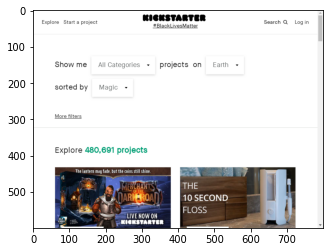

In [5]:
wd.save_screenshot('screenshot.png')

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/screenshot.png')
imgplot = plt.imshow(img)
plt.show()

Let's try to extract some information from the page



`title` contains the title of our page.




In [6]:
print(wd.title)

Discover Projects — Kickstarter


### First exercise with *Selenium*

Try it yourself... Print the contents of the page on the screen!

Complete the code and annotate the different behaviour. Try to use the attributes/methods applied to `wd`

- `page_source`
- `find_element_by_tag_name("body")`
- `find_element_by_tag_name("body").text`




In [0]:
print(....)

### How do we extract the values inside a page with CSS Selector?

Selenium has a method called `find_elements_by_css_selector`.

We will pass our CSS Selector into this method and get a list of selenium elements. Once we have the element, we can extract the text inside it using the `text` function.

In [7]:
list_h3 = wd.find_elements_by_css_selector("h3")
print(len(list_h3))

17


In [0]:
print(list_h3[0].text)

Explore 480,677 projects


### Exercise on *find_elements_by_css_selector*

Try to export the list of `p` elements and show the content of the first element.




In [0]:
list_p = wd......("...")
print(len(list_p))

# Project List from Kickstarter

Let's begin to download the list of projects.

The list of projects is defined by the css selection rule
`#projects_list > div > div.js-react-proj-card`



In [8]:
list_projects = wd.find_elements_by_css_selector("#projects_list > div > div.js-react-proj-card")
print(len(list_projects))

12


Gread! We find 12 project!

Now, we will extract the attribute from each single element.
The scope is to create one dict for each project in the list with the attribute:


1.   url
2.   title
3.   description
4.   category
5.   location



In [0]:
import pprint
detail_projects = []
for project in list_projects:
    title = project.find_elements_by_css_selector("h3")[0].text
    url = project.find_elements_by_css_selector("a")[0].get_attribute("href")
    description = project.find_elements_by_css_selector(".mb3 p")[0].text
    category = project.find_elements_by_css_selector(".pb3 a")[4].text
    location = project.find_elements_by_css_selector(".pb3 a")[5].text
    project_id = project.get_attribute("data-pid")

    detail_projects.append({'url': url,
                            'title': title,
                            'description': description,
                            'category': category,
                            'location': location,
                            'project_id': project_id})

len(detail_projects)
pprint.pprint(detail_projects)

Now let's try downloading all the ads on the front page...
and then move on to the second.

First we define a `parse_project` function to make the code cleaner and to reuse the function.

In [0]:
def parse_project(project):
  project_id = project.get_attribute("data-pid")
  title = ""
  description = ""
  category = ""
  location = ""
  try:
    title = project.find_elements_by_css_selector("h3")[0].text
    url = project.find_elements_by_css_selector("a")[0].get_attribute("href")
    description = project.find_elements_by_css_selector(".mb3 p")[0].text
    category = project.find_elements_by_css_selector(".pb3 a")[4].text
    location = project.find_elements_by_css_selector(".pb3 a")[5].text
  except:
    pass
  return {'url': url,
          'title': title,
          'description': description,
          'category': category,
          'location': location,
          'project_id': project_id}


Here's how to download the first two pages of projects...

In [14]:
detail_projects = []
for num in tqdm(range(1,3)):
  wd.get(f"https://www.kickstarter.com/discover/advanced?sort=magic&ref=nav_search&page={num}")
  wd.save_screenshot(f'screenshot_{num}.png')
  list_projects = wd.find_elements_by_css_selector("#projects_list > div > div.js-react-proj-card")
  for project in list_projects:
    detail_projects.append(parse_project(project))

print(len(detail_projects))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  



24


Have you seen the bookstore **tqdm**!
Find at this link all the documentation **https://github.com/tqdm/tqdm**:
is very useful to make our notebook more nice...

### How to end scraping?
Problem: When do we stop?

There are several ways. Some simpler and some more advanced:
- We can search inside the page for the ad number and divide it by 12
- We can check the status of the request (if (status_code == 200):... for a list of possible http status codes please check https://en.wikipedia.org/wiki/List_of_HTTP_status_codes)
- We can check the number of ads found (if > 0...)
- Other more advanced techniques...

For example, in our case, let's go to verify the presence, or not, of the *Load more* button inside the page. If present, we continue scraping, otherwise we stop.

Actually, we can also combine more than one of these techniques.

For this exercise we will just download the first 10 pages.

In [21]:
import time
detail_projects = []
for num in tqdm(range(1,100)):
  time.sleep(1)
  wd.get(f"https://www.kickstarter.com/discover/advanced?sort=magic&ref=nav_search&page={num}")
  wd.save_screenshot(f'screenshot_{num}.png')
  list_projects = wd.find_elements_by_css_selector("#projects_list > div > div.js-react-proj-card")
  for project in list_projects:
    detail_projects.append(parse_project(project))

print(len(detail_projects))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until



1188


# Pandas and data processing

**Well!**
We're starting to see another amazing library for working with data!

It's **pandas**: *Python library for data analysis*.

Basically, with pandas we can manipulate a data set or a historical series in Python.

For now, we start to give a couple of concepts.

Pandas is based on two types of data: **Series** and **DataFrame**:
- `Series` represents a list of data
- `DataFrame` represent a data set in tabular format

Each column of a `DataFrame` is a `Series`.

We can create a `DataFrame` using the `pd.DataFrame` method by passing our dictionary as an input parameter.

A `DataFrame` pandas can be easily exported in *CSV*, *Excel*, ...

For more information about `Pandas` see

https://pandas.pydata.org/getting_started.html


In [35]:
import pandas as pd
ds_detail_projects = pd.DataFrame(detail_projects)
ds_detail_projects.set_index("project_id")
ds_detail_projects.head()

,url,title,description,category,location,project_id
0,https://www.kickstarter.com/projects/ryze-ups/...,RYZE-UPS: The Modern Pull-Up Bar,Pull-up handles that fold to the size of a boo...,Product Design,"Salt Lake City, UT",374785399
1,https://www.kickstarter.com/projects/francesca...,Doctor Li and the Crown-wearing Virus,A children's book about the global pandemic fr...,Children's Books,"Los Angeles, CA",1949440126
2,https://www.kickstarter.com/projects/strangeho...,Strange Horizons 2021,A free weekly speculative fiction magazine wit...,Literary Journals,"Baltimore, MD",1602201731
3,https://www.kickstarter.com/projects/travishan...,"Bristol 1350: A Medieval Game of Racing, Plagu...",Be on the first cart out of town while avoidin...,Tabletop Games,"Columbus, OH",125859400
4,https://www.kickstarter.com/projects/princesso...,Princess Or...,Need help printing and marketing a book for yo...,Children's Books,"Dayton, OH",1376306706


The `.info()` method provides an indication of the structure and data of the `DataFrame`.

In [33]:
ds_detail_projects.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1188 entries, 374785399 to 1929062368
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   1188 non-null   int64 
 1   url          1188 non-null   object
 2   title        1188 non-null   object
 3   description  1188 non-null   object
 4   category     1188 non-null   object
 5   location     231 non-null    object
dtypes: int64(1), object(5)
memory usage: 65.0+ KB


In [0]:
ds_detail_projects.to_csv('ds_projects.csv')

# Kickstarter Project pages ###

Now, the goal is to navigate and download the details of each project and pictures of the houses.

**Pandas** provides the *.read_csv* method that allows you to upload in CSV format files within a DataFrame.

In [72]:
# open csv file
import pandas as pd
ds_detail_projects = pd.read_csv("ds_projects.csv", index_col="project_id")
ds_detail_projects.head()

,Unnamed: 0,url,title,description,category,location
project_id,,,,,,
374785399,0,https://www.kickstarter.com/projects/ryze-ups/...,RYZE-UPS: The Modern Pull-Up Bar,Pull-up handles that fold to the size of a boo...,Product Design,"Salt Lake City, UT"
1949440126,1,https://www.kickstarter.com/projects/francesca...,Doctor Li and the Crown-wearing Virus,A children's book about the global pandemic fr...,Children's Books,"Los Angeles, CA"
1602201731,2,https://www.kickstarter.com/projects/strangeho...,Strange Horizons 2021,A free weekly speculative fiction magazine wit...,Literary Journals,"Baltimore, MD"
125859400,3,https://www.kickstarter.com/projects/travishan...,"Bristol 1350: A Medieval Game of Racing, Plagu...",Be on the first cart out of town while avoidin...,Tabletop Games,"Columbus, OH"
1376306706,4,https://www.kickstarter.com/projects/princesso...,Princess Or...,Need help printing and marketing a book for yo...,Children's Books,"Dayton, OH"


***For each project we go to the link... how do you think we do it?***

Let's try the first 5 projects.



These days most of the web apps are using AJAX techniques. When a page is loaded by the browser, the elements within that page may load at different time intervals. Using waits, we can stop our scraping and wait the loading of a element.

Selenium Webdriver provides two types of waits - implicit & explicit. An explicit wait makes WebDriver wait for a certain condition to occur before proceeding further with execution. An implicit wait makes WebDriver poll the DOM for a certain amount of time when trying to locate an element.


In [0]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
details = []
for project_id, project in ds_detail_projects.head().iterrows():
    time.sleep(10)
    link = project["url"]
    print(link)
    wd.set_window_size(1920, 1080)
    wd.get(link)
    try:
      WebDriverWait(wd, 10).until(
          EC.element_to_be_clickable((By.ID, "back-project-button"))
      )
    except:
      continue

    wd.save_screenshot(f'screenshot_{project_id}.png')
    backers = wd.find_elements_by_css_selector(".type-16.dark-grey-500")[0].text
    goal = wd.find_elements_by_css_selector(".ksr-green-500")[0].text
    pledged = wd.find_elements_by_css_selector("span.money")[1].text
    details.append({'project_id': project_id,
                    'backers': backers,
                    'goal': goal,
                    'pledged': pledged})
  
len(details)
pprint.pprint(details)


https://www.kickstarter.com/projects/lawriebrewster/the-book-of-beastly-creatures-stories-rpg-rules-and-artwork?ref=discovery
https://www.kickstarter.com/projects/159974695/skedaddleosaurus-bags?ref=discovery
https://www.kickstarter.com/projects/brentdickman/merchants-of-the-dark-road?ref=discovery
https://www.kickstarter.com/projects/instafloss/instafloss-say-bye-to-painful-time-consuming-flossing?ref=discovery
https://www.kickstarter.com/projects/575448464/fire-tower-rising-flames-expansion-reprint?ref=discovery
[{'backers': '', 'goal': '', 'pledged': '£6,000', 'project_id': 811926054},
 {'backers': '', 'goal': '', 'pledged': '$5,000', 'project_id': 632552919},
 {'backers': '', 'goal': '', 'pledged': '$35,000', 'project_id': 1446671987},
 {'backers': '', 'goal': '', 'pledged': '$20,000', 'project_id': 748081064},
 {'backers': '', 'goal': '', 'pledged': '$8,000', 'project_id': 1944804664}]


In [0]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
details = []
for project_id, project in ds_detail_projects.iterrows():
    time.sleep(2)
    link = project["url"]
    backers = 0
    goal = 0
    pledged = 0
    #print(link)
    try:
      wd.set_window_size(1920, 1080)
      wd.get(link)
      try:
        WebDriverWait(wd, 10).until(
            EC.element_to_be_clickable((By.ID, "back-project-button"))
        )
      except:
        continue

      wd.save_screenshot(f'screenshot_{project_id}.png')
      backers_list = wd.find_elements_by_css_selector(".type-16.dark-grey-500")
      goal_list = wd.find_elements_by_css_selector(".ksr-green-500")
      pledged_list = wd.find_elements_by_css_selector("span.money")
      if(len(backers_list) > 0):
        backers = int(backers_list[0].text.replace(",", ""))
      if(len(goal_list) > 0):
        goal = int(goal_list[0].text.replace(",", "").replace("$", "").replace("US", ""))
      if(len(pledged_list) > 1):
        pledged = int(pledged_list[1].text.replace(",", "").replace("$", "").replace("US", ""))
    except Exception as e:
      print(e)
    details.append({'project_id': project_id,
                    'backers': backers,
                    'goal': goal,
                    'pledged': pledged})
  
print(len(details))
#pprint.pprint(details)


In [0]:
len(details)

Store the data with *pandas*

In [0]:
import pandas as pd
ds_details = pd.DataFrame(details)
ds_details.set_index("project_id")
ds_details.head()

In [0]:
ds_details.info()

In [0]:
ds_details.to_csv("ds_project_details.csv")

# Kickstarter Project images


Now we're going to download Kickstarter images for each project.

Our goal is to create a dataset of images and a `Dataframe` composed by:
- `project_id`
- `image_id`

We will use the library `requests`.

The `requests` library is python library for making HTTP requests.
It abstracts the complexities of making requests behind a simple API so that you can focus on interacting with services and consuming data in your application.

In [0]:
import time
import requests

detail_projects = []
list_images = []

for num in tqdm(range(1,100)):
  time.sleep(1)
  wd.get(f"https://www.kickstarter.com/discover/advanced?sort=magic&ref=nav_search&page={num}")
  list_projects = wd.find_elements_by_css_selector("#projects_list > div > div.js-react-proj-card")
  for project in list_projects:
    try:
      project_id = project.get_attribute("data-pid")
      src = project.find_element_by_css_selector("a img").get_attribute("src")
      list_images.append({"project_id": project_id,
                          "img_file": "img_" + str(project_id) + ".jpg"})
      img_file = requests.get(src, stream=True)
      if img_file.status_code == 200:
        with open("/content/images/img_" + str(project_id) + ".jpg", 'wb') as f:
          f.write(img_file.content)
    except Exception as e:
      print(e)



In [74]:
print(len(list_images))

1188


Populating the interactive namespace from numpy and matplotlib


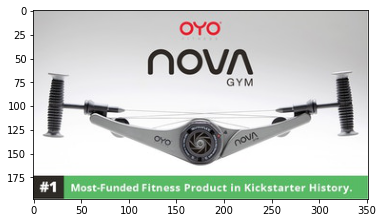

In [75]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/images/img_142016465.jpg')
imgplot = plt.imshow(img)
plt.show()

In [76]:
import pandas as pd
ds_images = pd.DataFrame(list_images)
ds_images.set_index("project_id")
ds_images.head()

,project_id,img_file
0,374785399,img_374785399.jpg
1,1949440126,img_1949440126.jpg
2,1602201731,img_1602201731.jpg
3,125859400,img_125859400.jpg
4,1376306706,img_1376306706.jpg


In [63]:
ds_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   project_id  1188 non-null   int64 
 1   img_file    1188 non-null   object
dtypes: int64(1), object(1)
memory usage: 18.7+ KB


In [0]:
ds_images.to_csv("ds_images.csv")

In [0]:
!zip -r "/content/images.zip" "/content/images/"


# API

Let's see how to use the **requests** library to hook APIs provided by our suppliers or colleagues.

## Crarifai

Let's try the services provided by Clarifai to increase the data we have available.


First, we need to install the `crarifai` python library.
For more details, please visit https://github.com/Clarifai/clarifai-python

To install the API client:


```
pip install clarifai
```






In [0]:
!pip install clarifai

In [0]:
from clarifai.rest import ClarifaiApp

# setup your key!!!
clarifai_key = "<your_key>"
app = ClarifaiApp(api_key=clarifai_key)

# and use the general model
model = app.public_models.general_model

We will use the `predict_by_filename` method to obtain the **concepts** within the page.


In [0]:
response = model.predict_by_filename("/content/images/img_142016465.jpg")

What type of data does that give us back?
Let's have a look!

In [0]:
pprint.pprint(response)

And get the data:

In [70]:
if(response['status']['description'] == "Ok"):
    for concept in response["outputs"][0]["data"]["concepts"]:
        name = concept["name"]
        value = concept["value"]
        print(name + " " + str(value))

horizontal 0.9519128203392029
isolated 0.9426192045211792
no person 0.9122359752655029
transportation system 0.9029916524887085
business 0.8892199993133545
service 0.8800047636032104
technology 0.8767427206039429
illustration 0.8746852874755859
equipment 0.8589984178543091
connection 0.8415480852127075
wheel 0.8403968811035156
desktop 0.8387061357498169
vector 0.8360087871551514
symbol 0.8336005210876465
sport 0.7958953380584717
control 0.7861691117286682
text 0.7860429286956787
modern 0.7815584540367126
designing 0.766112208366394
focus 0.7455539703369141


Now let's go and identify all the concepts for each image of each project.

In [0]:
ds_images = pd.read_csv("ds_images.csv", index_col="project_id")

img_details = []
for project_id, image in tqdm(ds_images.iterrows(), total=ds_images.shape[0]):
  try:
    response = model.predict_by_filename("/content/images/" + image['img_file'])
    if(response['status']['description'] == "Ok"):
      for concept in response["outputs"][0]["data"]["concepts"]:
          name = concept["name"]
          value = concept["value"]
          img_details.append({
            "project_id": project_id,
            "image": image['img_file'],
            "name": name,
            "value": value
          })
  except Exception as e:
    print(e)

print(len(img_details))

In [79]:
import pandas as pd
ds_img_details = pd.DataFrame(img_details)
ds_img_details.set_index("image")
ds_img_details.head()

,project_id,image,name,value
0,374785399,img_374785399.jpg,indoors,0.972585
1,374785399,img_374785399.jpg,woman,0.963287
2,374785399,img_374785399.jpg,people,0.946491
3,374785399,img_374785399.jpg,man,0.939974
4,374785399,img_374785399.jpg,business,0.934942


In [80]:
ds_img_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17420 entries, 0 to 17419
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   project_id  17420 non-null  int64  
 1   image       17420 non-null  object 
 2   name        17420 non-null  object 
 3   value       17420 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 544.5+ KB


In [0]:
ds_img_details.to_csv('ds_img_details.csv')

# Geocoding

What's geocoding?



Let's try to geolocalize the projects...

In [27]:
import requests
import json

address = "via finazzi 46, carvico(bg)"
key = "<your_key>"
geocode_url = f"http://www.mapquestapi.com/geocoding/v1/address?key={key}&location={address}"
response = requests.get(geocode_url)

import json
geo = json.loads(response.text)
pprint.pprint(response.text)

('{"info":{"statuscode":0,"copyright":{"text":"\\u00A9 2020 MapQuest, '
 'Inc.","imageUrl":"http://api.mqcdn.com/res/mqlogo.gif","imageAltText":"\\u00A9 '
 '2020 MapQuest, '
 'Inc."},"messages":[]},"options":{"maxResults":-1,"thumbMaps":true,"ignoreLatLngInput":false},"results":[{"providedLocation":{"location":"via '
 'finazzi 46, '
 'carvico(bg)"},"locations":[{"street":"","adminArea6":"","adminArea6Type":"Neighborhood","adminArea5":"Carvico","adminArea5Type":"City","adminArea4":"BG","adminArea4Type":"County","adminArea3":"Lombardy","adminArea3Type":"State","adminArea1":"IT","adminArea1Type":"Country","postalCode":"","geocodeQualityCode":"A5XAX","geocodeQuality":"CITY","dragPoint":false,"sideOfStreet":"N","linkId":"282493759","unknownInput":"","type":"s","latLng":{"lat":45.703779,"lng":9.482249},"displayLatLng":{"lat":45.703779,"lng":9.482249},"mapUrl":"http://www.mapquestapi.com/staticmap/v5/map?key=r3xgNwBAviBMdOj4Op90kvyy2iO1CDGz&type=map&size=225,160&locations=45.703779,9.482249|m

In [28]:
print(geo['results'][0]['locations'][0]['latLng']['lat'])
print(geo['results'][0]['locations'][0]['latLng']['lng'])

45.703779
9.482249


In [0]:
ds_projects = pd.read_csv("ds_projects.csv", index_col="project_id")

import time
project_location = []
for project_id, project in tqdm(ds_projects.iterrows(), total=ds_projects.shape[0]):
  time.sleep(1)
  address = project['location']
  key = "<your_key>"
  try:
    geocode_url = f"http://www.mapquestapi.com/geocoding/v1/address?key={key}&location={address}"
    response = requests.get(geocode_url)
    if(response.status_code == 200):
      geo = json.loads(response.text)
      lat = geo['results'][0]['locations'][0]['latLng']['lat']
      lng = geo['results'][0]['locations'][0]['latLng']['lng']
      project_location.append({
            "project_id": project_id,
            "lat": lat,
            "lng": lng
          })
  except Exception as e:
    print(e)
    

print(len(project_location))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


In [0]:
import pandas as pd
ds_project_location = pd.DataFrame(project_location)
ds_project_location.set_index("project_id")
ds_project_location.head(20)

,project_id,lat,lng
0,1010744379,51.500150,-0.126240
1,1015125619,32.080590,-81.090103
2,1774324319,42.358894,-71.056742
3,245959053,40.713054,-74.007228
4,1949440126,34.052238,-118.243344


In [0]:
ds_project_location.info()

In [0]:
ds_project_location.to_csv('ds_project_location.csv')